In [1]:
import pandas as pd
import numpy as np

In [2]:
jobs=pd.read_csv("jobs.csv")

In [3]:
jobs.head()

,Unnamed: 0,emp_title
0,0,NaN
1,1,Ryder
2,2,NaN
3,3,AIR RESOURCES BOARD
4,4,University Medical Group


In [4]:
jobs.fillna("other",inplace=True)

In [5]:
jobs.columns

Index(['Unnamed: 0', 'emp_title'], dtype='object')

In [6]:
jobs.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
jobs.emp_title=jobs.emp_title.str.lower()

In [8]:
jobs.head()

,emp_title
0,other
1,ryder
2,other
3,air resources board
4,university medical group


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tv=TfidfVectorizer()

In [11]:
jobs_list=list(jobs.emp_title)

In [12]:
x_tv=tv.fit_transform(jobs_list)

In [13]:
type(x_tv)

scipy.sparse.csr.csr_matrix

In [14]:
from sklearn.cluster import KMeans

In [15]:
jobs.head()

,emp_title
0,other
1,ryder
2,other
3,air resources board
4,university medical group


In [16]:
jobs2=pd.read_csv("jobs2.csv")

In [17]:
jobs2.head()

,Unnamed: 0,emp_title
0,0,NaN
1,1,teacher
2,2,Front Office
3,3,Manager
4,4,Paramedic


In [18]:
jobs2.emp_title.fillna("other",inplace=True)

In [19]:
jobs2.emp_title=jobs2.emp_title.str.lower()

In [20]:
jobs2.head()

,Unnamed: 0,emp_title
0,0,other
1,1,teacher
2,2,front office
3,3,manager
4,4,paramedic


In [21]:
jobs_list2=list(jobs2.emp_title)


In [22]:
x2_tv=tv.transform(jobs_list2)

In [23]:
from collections import defaultdict
inertia=[]
km=defaultdict()
for i in range(1,6):
    print("Clustering on ",i," clusters")
    km[i]=KMeans(n_clusters=i)
    km[i].fit(x_tv)
    inertia.append(km[i].inertia_)
   
    

Clustering on  1  clusters
Clustering on  2  clusters
Clustering on  3  clusters
Clustering on  4  clusters
Clustering on  5  clusters


In [24]:
for i in range(6,10):
    print("Clustering on ",i," clusters")
    km[i]=KMeans(n_clusters=i)
    km[i].fit(x_tv)
    inertia.append(km[i].inertia_)
   

Clustering on  6  clusters
Clustering on  7  clusters
Clustering on  8  clusters
Clustering on  9  clusters


In [25]:
inertia

[876074.5531209679,
 827137.7490547413,
 803815.3666231052,
 794295.7802205536,
 789353.5716945524,
 773274.6951899498,
 763457.0866070999,
 759542.8747085832,
 746604.8991698726]

In [26]:
for i in range(10,16):
    print("Clustering on ",i," clusters")
    km[i]=KMeans(n_clusters=i)
    km[i].fit(x_tv)
    inertia.append(km[i].inertia_)
   

Clustering on  10  clusters
Clustering on  11  clusters
Clustering on  12  clusters
Clustering on  13  clusters
Clustering on  14  clusters
Clustering on  15  clusters


In [27]:
import matplotlib.pyplot as plt

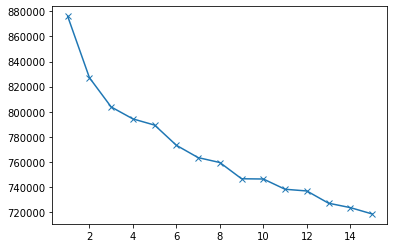

In [29]:
plt.plot(range(1,16),inertia,marker='x')
plt.show()

In [30]:
km

defaultdict(None,
            {1: KMeans(n_clusters=1),
             2: KMeans(n_clusters=2),
             3: KMeans(n_clusters=3),
             4: KMeans(n_clusters=4),
             5: KMeans(n_clusters=5),
             6: KMeans(n_clusters=6),
             7: KMeans(n_clusters=7),
             8: KMeans(),
             9: KMeans(n_clusters=9),
             10: KMeans(n_clusters=10),
             11: KMeans(n_clusters=11),
             12: KMeans(n_clusters=12),
             13: KMeans(n_clusters=13),
             14: KMeans(n_clusters=14),
             15: KMeans(n_clusters=15)})

In [31]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(x_tv,km[9].labels_)

0.11883030296229213